# First Order System
현재 시간의 상태가 이전 시간의 상태와 관련이 있다고 가정    

## 이전 시간의 상태만 입력으로 
> Autonomous System이라고도 하며, 외부 입력 없이 자기 혼자서 돌아가는 특징이 있습니다.

수식은 아래와 같다.
$$
x_t = f(x_{t-1})
$$
- $x$ : 상태 
- $t$ : 시간 
- $x_t$: t시간일 때의 상태  
- $x_{t-1}$: t-1시간(이전 시간)일 때의 상태 

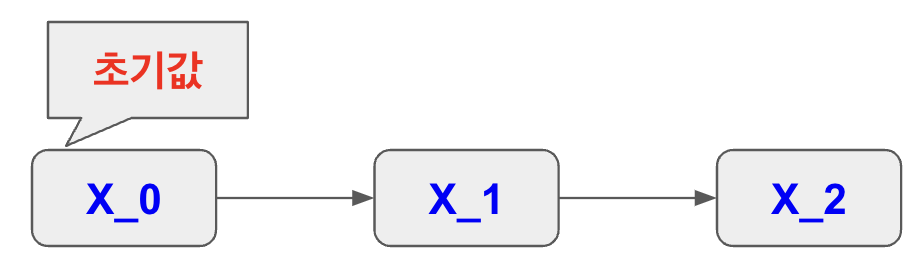

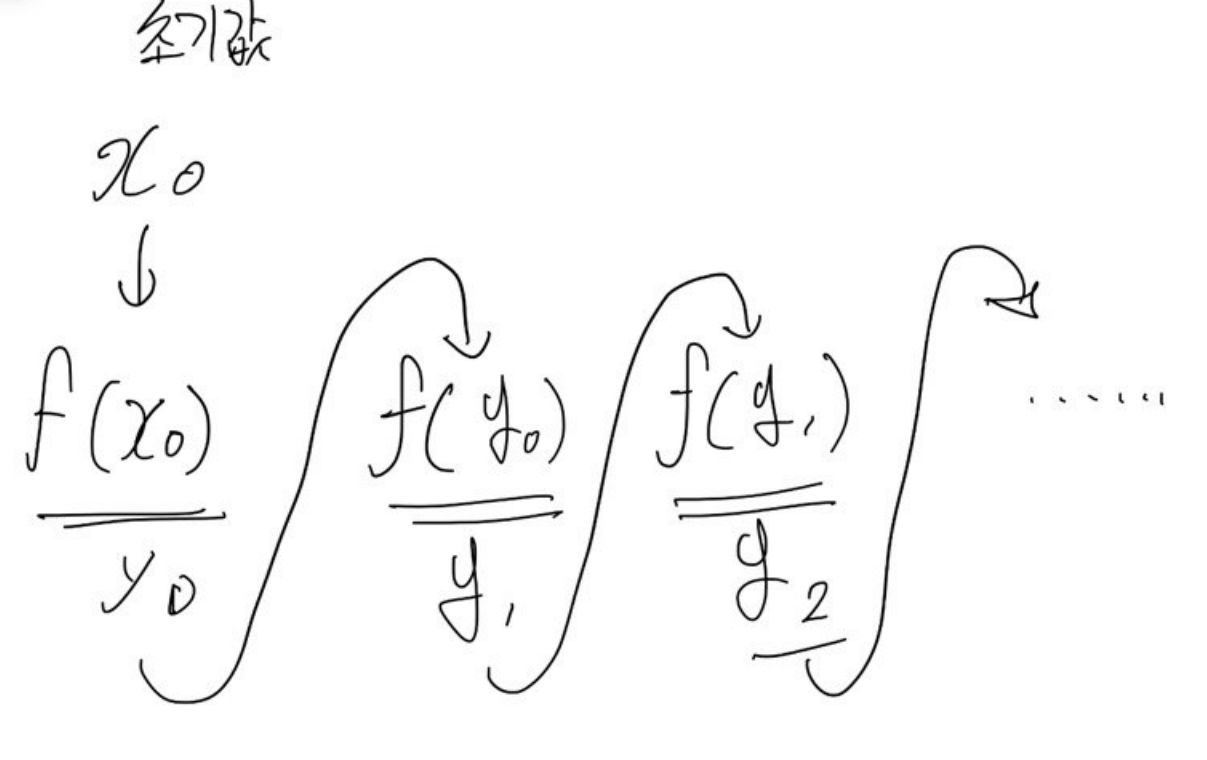

## 이전 시간의 상태와 현재 값을 입력으로 
수식은 아래와 같다.
$$
x_t = f(x_{t-1},u_t)
$$
- $x$ : 상태 
- $t$ : 시간 
- $u_t$: t시간일 때의 현재(입력) 값
- $x_t$: t시간일 때의 상태  
- $x_{t-1}$: t-1시간(이전 시간)일 때의 상태 

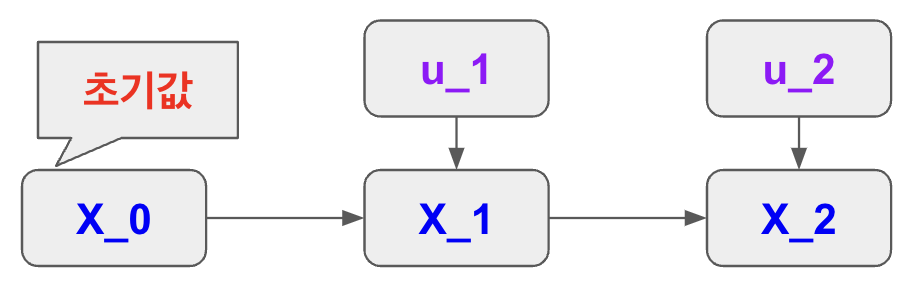

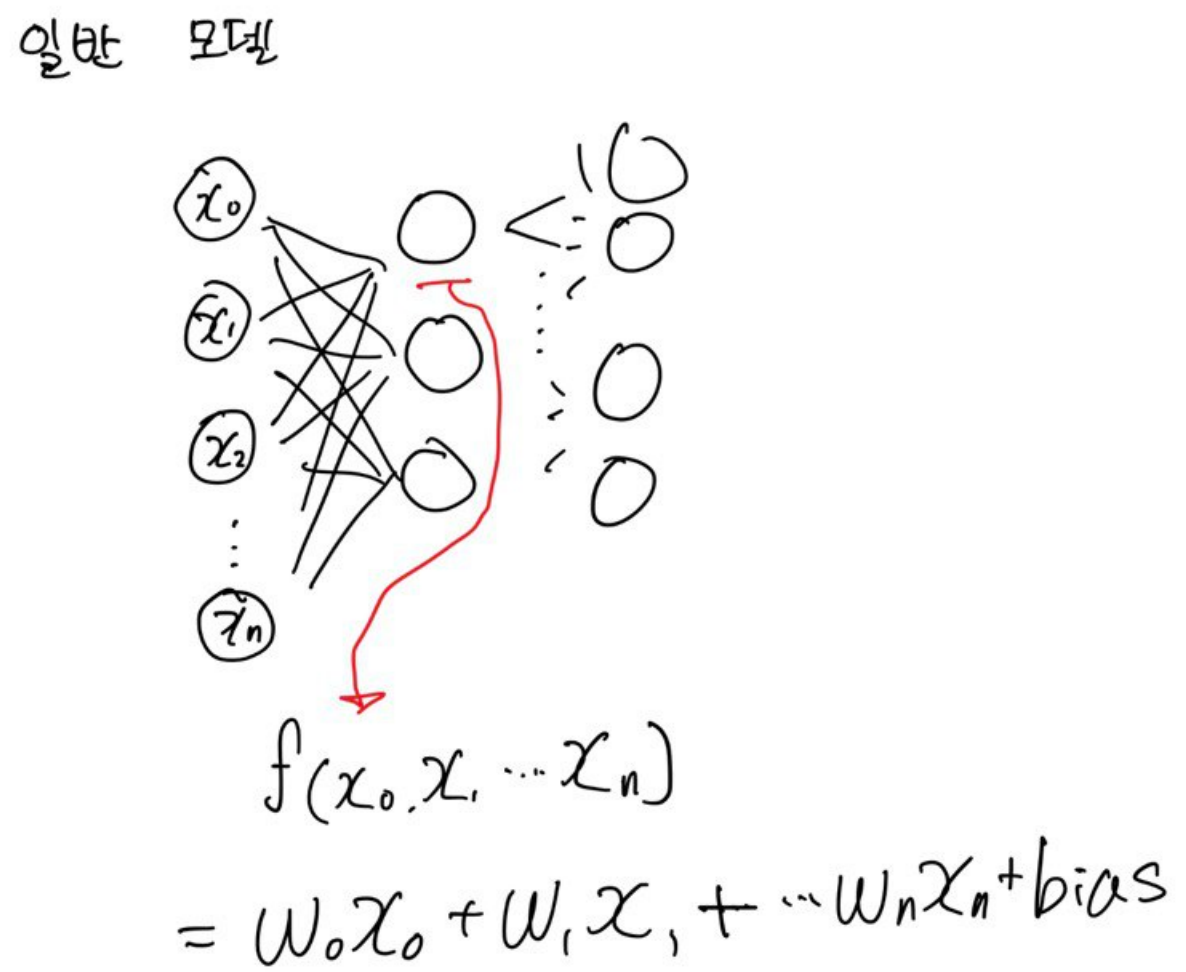

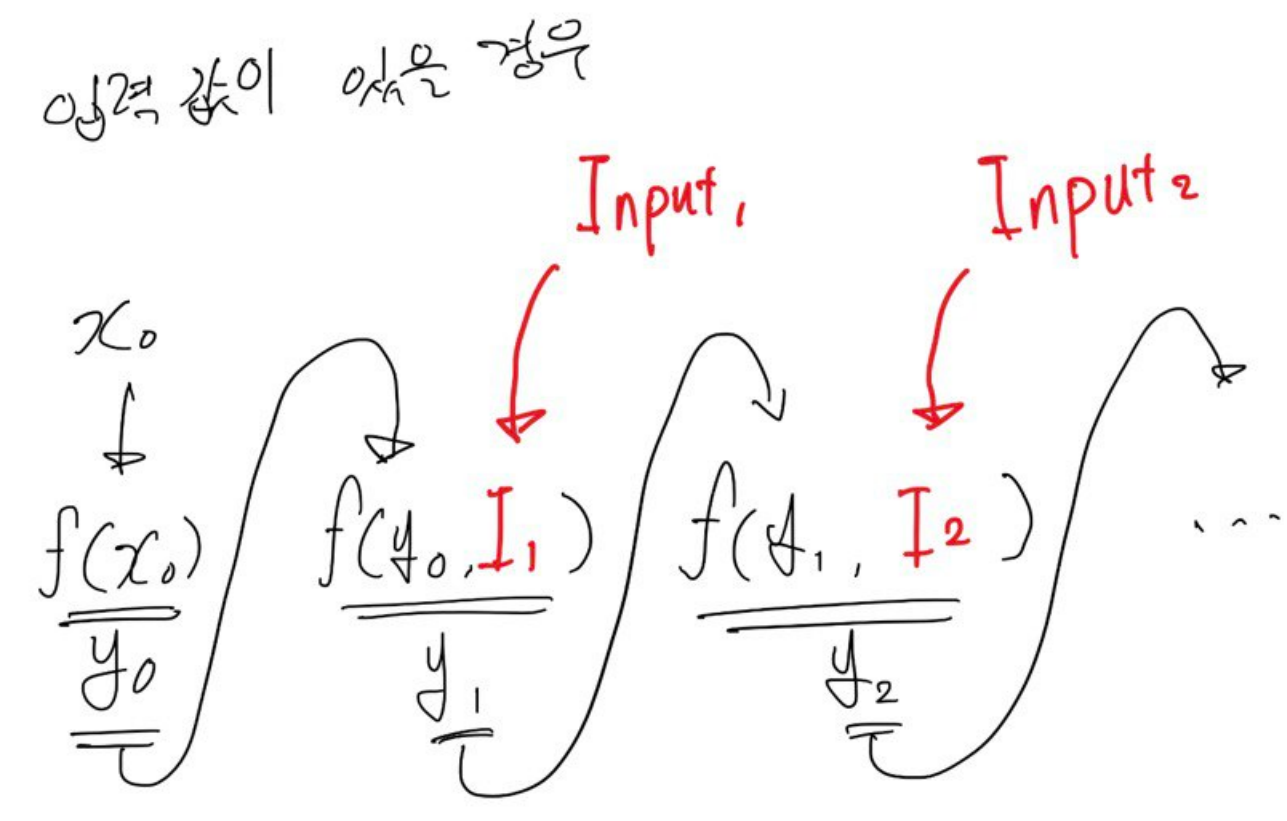

#### RNN
- 이전 결과값들의 데이터도 인풋으로 들어감
    - 순서대로 처리(학습) 가능
    - 즉 시계열 데이터를 순서대로 학습이 가능함

# State-Space Model 
- 1차원 시스템의 모형(First Order System):     
$$
x_t = f(x_{t-1}, u_t)
$$
- 각 시간에서 관측 가능한 상태($x_t$)의 모음: 출력 $y_t$
$$
y_t = h(x_t)
$$

- $x$ : 상태(hidden layer의 state) 
- $t$ : 시간 
- $u_t$: t시간일 때의 현재(입력) 값
- $x_t$: t시간일 때의 상태  
- $x_{t-1}$: t-1시간(이전 시간)일 때의 상태 
- $y_t$: t시간일 때의 출력 값 

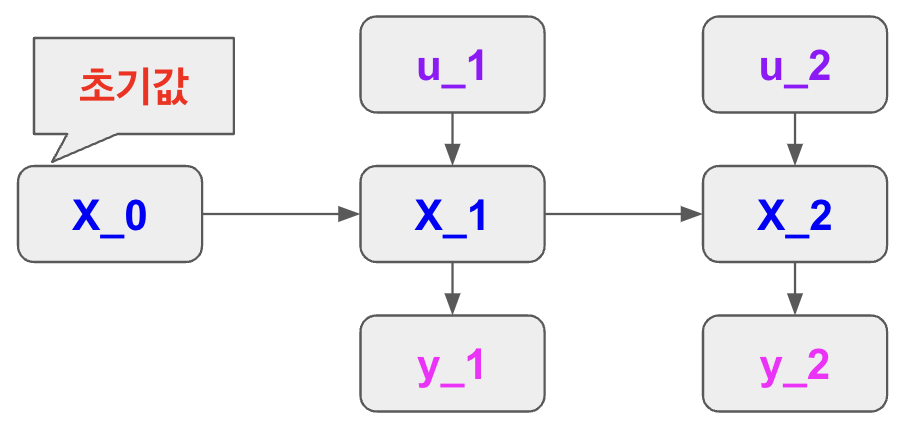

# [RNN(Recurrent Neural Networks)](https://ko.wikipedia.org/wiki/%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D)
- RNN이란 Recurrent Neural Networks의 약자로, 순환 신경망을 뜻합니다. 순환 신경망이라는 이름은 입력받는 신호의 길이가 한정되지 않은 동적 데이터를 처리한다는 점에서 붙여진 이름입니다.    

CNN vs RNN 
- CNN은 이미지 구역별로 같은 weight를 공유한다.
- RNN은 시간별 같은 weight를 공유한다. 

## RNN 특징 
- $h_t$는 t일 때의 hidden layer 상태를 나타낸다. 
- $h_t$는 이전까지의 상태($h_{0}, h_{t-1}$)와 이전까지의 입력($x_{t-1}, x_t$)을 대표할 수 있는 압축본이라고 할 수 있습니다.

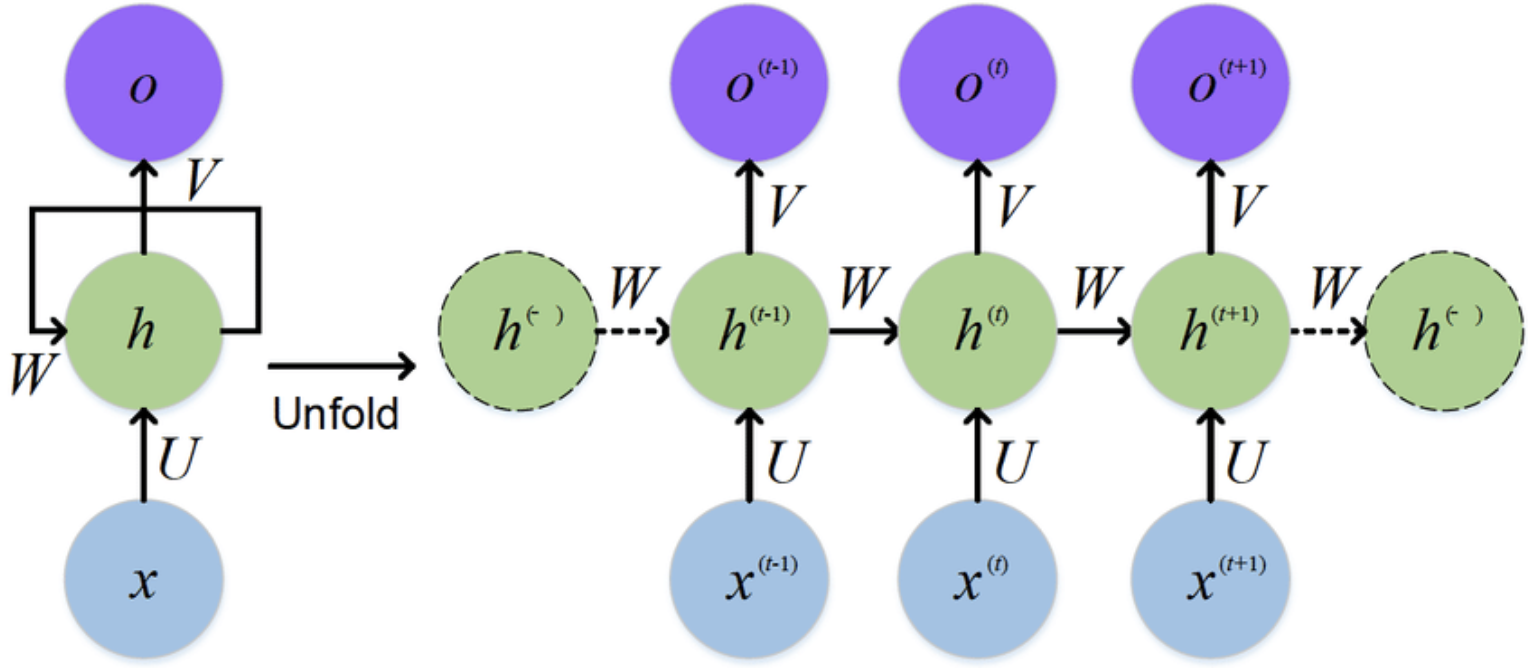

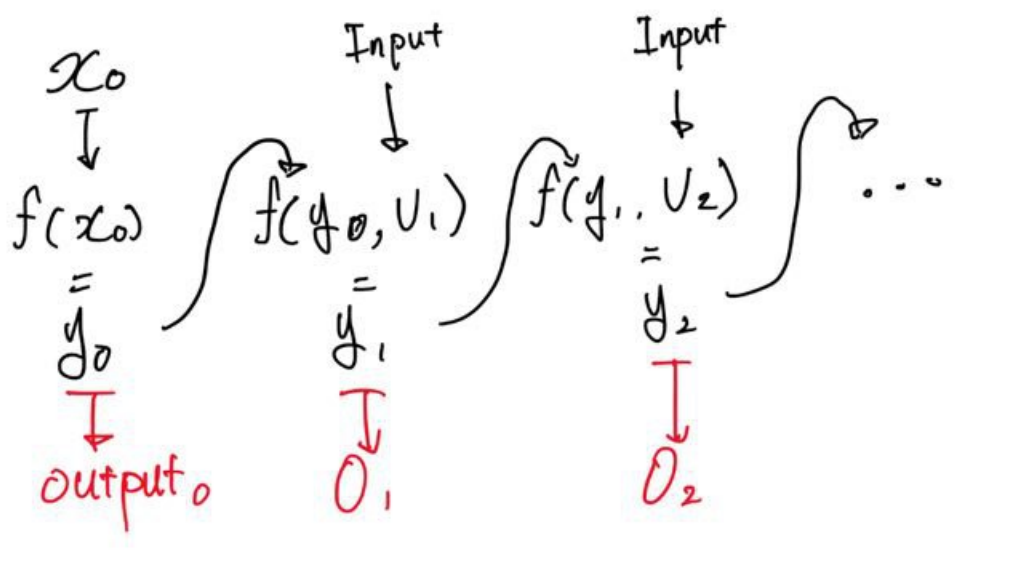

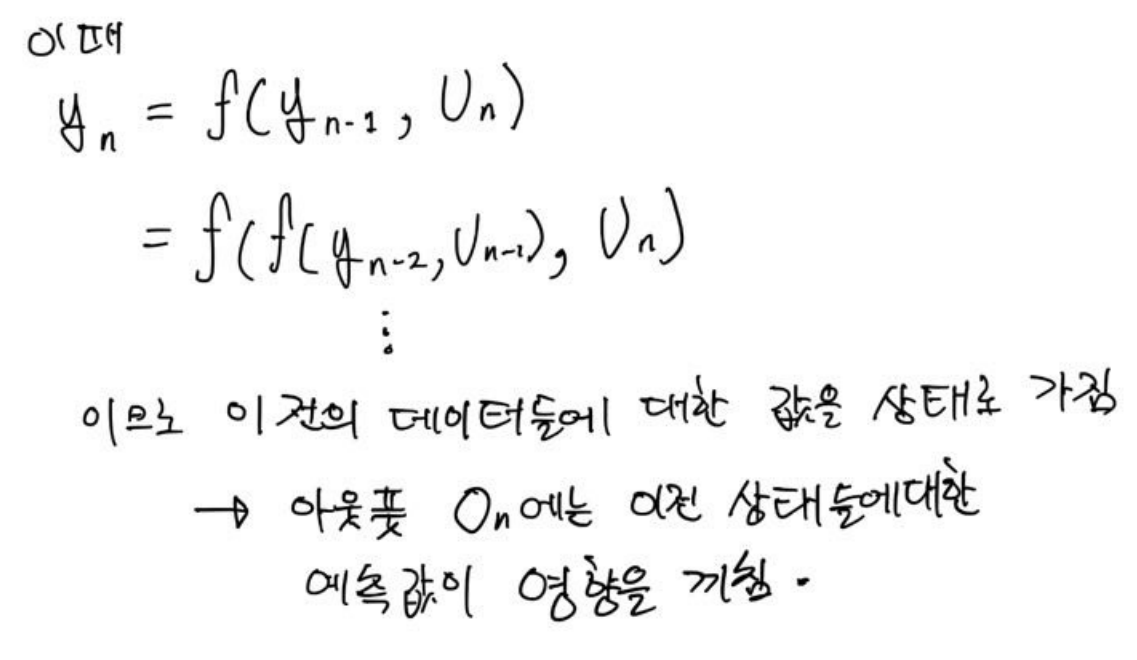

## RNN 구조 종류 

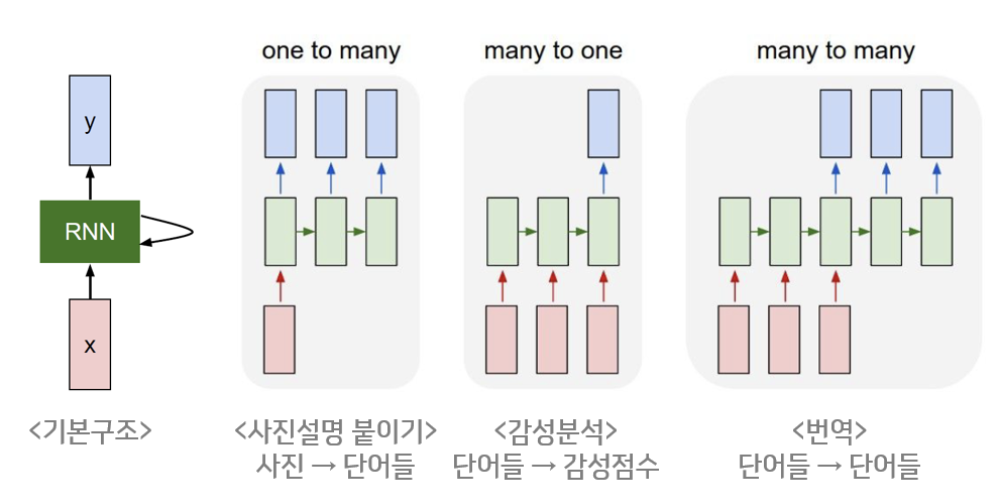

#### 언어 모델의 경우 마지막 모델이 많이 사용됨 -> 한국어는 끝까지 들어봐라?

## [RNN 연산](https://wikidocs.net/22886)

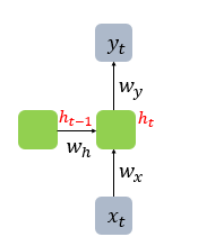

- 현재 시점 t에서의 은닉 상태값을 $h_t$라고 정의하겠습니다. 은닉층의 메모리 셀은  $h_t$를 계산하기 위해서 총 두 개의 가중치를 가집니다. 
- 하나는 입력층을 위한 가중치 $W_x$이고, 하나는 이전 시점 t-1의 은닉 상태값인 $h_{t-1}$을 위한 가중치 $W_h$입니다.

이를 식으로 표현하면 다음과 같습니다. 
- 은닉층: $h_t = tanh(W_x x_t + W_h h_{t-1} + b)$ 
- -> 일반 레이어같은 회귀모델 + tanh(sigmoid같은 활성함수)
- 출력층: $y_t = f(W_y h_t +b)$
  - f()는 activate function

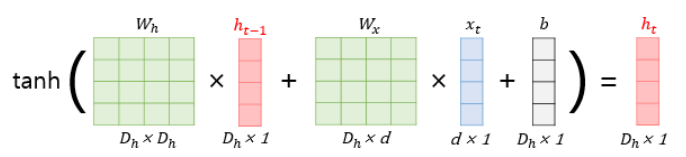

# [TextRNN](https://colab.research.google.com/github/graykode/nlp-tutorial/blob/master/3-1.TextRNN/TextRNN.ipynb)

## Data

### 데이터 생성 

In [1]:
sentences = ["i like dog", "i love coffee", "i hate milk"]
sentences

['i like dog', 'i love coffee', 'i hate milk']

### 데이터 토큰화 

In [2]:
word_list = " ".join(sentences).split()
word_list

['i', 'like', 'dog', 'i', 'love', 'coffee', 'i', 'hate', 'milk']

In [3]:
word_list = list(set(word_list))
word_list

['dog', 'milk', 'hate', 'coffee', 'like', 'love', 'i']

### 데이터 사전

In [4]:
word_dict = {w: i for i, w in enumerate(word_list)}
word_dict

{'dog': 0, 'milk': 1, 'hate': 2, 'coffee': 3, 'like': 4, 'love': 5, 'i': 6}

In [5]:
number_dict = {i: w for i, w in enumerate(word_list)}
number_dict

{0: 'dog', 1: 'milk', 2: 'hate', 3: 'coffee', 4: 'like', 5: 'love', 6: 'i'}

In [6]:
n_class = len(word_dict)
batch_size = len(sentences)
n_class, batch_size

(7, 3)

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

## Dataset

### 디버깅 

In [8]:
sen = sentences[0]
sen

'i like dog'

In [9]:
word = sen.split() # 토큰화 
word

['i', 'like', 'dog']

In [10]:
word[:-1]

['i', 'like']

In [11]:
input = [word_dict[n] for n in word[:-1]] # 인베딩 (문자 -> 숫자)
input 

[6, 4]

In [12]:
[number_dict[n] for n in input] # 숫자 -> 문자 

['i', 'like']

In [13]:
target = word_dict[word[-1]]
target, number_dict[target]

(0, 'dog')

In [14]:
n_class

7

In [15]:
np.eye(n_class)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [16]:
np.eye(n_class)[input] # 원핫인코딩 

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.]])

### Dataset 생성

In [17]:
def make_batch():
    input_batch = []
    target_batch = []

    for sen in sentences:
        word = sen.split()  # space tokenizer
        input = [word_dict[n] for n in word[:-1]]  # create (1~n-1) as input
        target = word_dict[word[-1]]  # create (n) as target, We usually call this 'casual language model'

        input_batch.append(np.eye(n_class)[input]) # 원핫인코딩
        target_batch.append(target)

    return input_batch, target_batch

In [18]:
input_batch, target_batch = make_batch()
np.array(input_batch).shape # [batch_size, n_step, n_class] 

(3, 2, 7)

## RNN Model 

In [19]:
n_hidden = 5 # number of hidden units in one cell

### 디버깅 

In [20]:
rnn = nn.RNN(input_size=n_class, hidden_size=n_hidden)

In [21]:
input_batch = torch.FloatTensor(input_batch)
input_batch.shape

<ipython-input-21-c46ec3f236b6>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  input_batch = torch.FloatTensor(input_batch)


torch.Size([3, 2, 7])

In [22]:
input_batch_transpose = input_batch.transpose(0, 1) 
input_batch_transpose.shape # (input_size, batch_size, emdding_size)

torch.Size([2, 3, 7])

In [23]:
hidden = torch.zeros(1, batch_size, n_hidden) # hidden 초기값
hidden.shape

torch.Size([1, 3, 5])

In [24]:
outputs, hidden = rnn(input_batch_transpose, hidden)
outputs.shape, hidden.shape 

(torch.Size([2, 3, 5]), torch.Size([1, 3, 5]))

In [25]:
outputs = outputs[-1]
outputs.shape

torch.Size([3, 5])

In [26]:
linear = nn.Linear(n_hidden, n_class, bias=False)

In [27]:
pred = linear(outputs)
pred.shape 

torch.Size([3, 7])

### RNN 모델 생성 

In [28]:
class TextRNN(nn.Module):
    def __init__(self):
        super(TextRNN, self).__init__()
        self.rnn = nn.RNN(input_size=n_class, hidden_size=n_hidden)
        self.linear = nn.Linear(n_hidden, n_class, bias=False)

    def forward(self, hidden, X):
        X = X.transpose(0, 1) 
        outputs, hidden = self.rnn(X, hidden)
        outputs = outputs[-1] 
        pred = self.linear(outputs) 
        return pred

## Training

In [29]:
model = TextRNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

input_batch, target_batch = make_batch()
input_batch = torch.FloatTensor(input_batch)
target_batch = torch.LongTensor(target_batch)

# Training
for epoch in range(5000):
    
    # hidden : [num_layers * num_directions, batch, hidden_size]
    hidden = torch.zeros(1, batch_size, n_hidden)
    # input_batch : [batch_size, n_step, n_class]
    output = model(hidden, input_batch)

    # output : [batch_size, n_class], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1) % 1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 1000 cost = 0.226019
Epoch: 2000 cost = 0.027525
Epoch: 3000 cost = 0.010061
Epoch: 4000 cost = 0.004957
Epoch: 5000 cost = 0.002715


## Predict

In [30]:
hidden = torch.zeros(1, batch_size, n_hidden)
hidden.shape 

torch.Size([1, 3, 5])

In [31]:
pred = model(hidden, input_batch)
pred.shape 

torch.Size([3, 7])

In [32]:
pred_soft = pred.softmax(dim=1)
pred_soft.shape 

torch.Size([3, 7])

In [33]:
pred_max = pred_soft.argmax(dim=1)
pred_max.shape 

torch.Size([3])

In [34]:
input = [sen.split()[:2] for sen in sentences]

print([sen.split()[:2] for sen in sentences], '->', [number_dict[n.item()] for n in pred_max])

[['i', 'like'], ['i', 'love'], ['i', 'hate']] -> ['dog', 'coffee', 'milk']
